# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Al Bani Abimanyu
- **Email:** 2300018359
- **ID Dicoding:** al_bani_abimanyu_51fy

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran seller di setiap state dan wilayah mana yang menunjukkan dominasi aktivitas penjualan?
- Bagaimana persebaran seller di tingkat kota dan kota mana yang berpotensi menjadi pusat pertumbuhan bisnis?

## Import Semua Packages/Library yang Digunakan

In [4]:
# Library untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk pengaturan tampilan
import warnings
warnings.filterwarnings("ignore")

# Mengatur style visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Data Wrangling

### Gathering Data

In [5]:
# Membaca dataset
df_sellers = pd.read_csv("/content/sellers_dataset.csv")

# Menampilkan 5 data teratas
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset memiliki X baris dan Y kolom, yang menunjukkan jumlah seller yang terdaftar dalam sistem.
- Dataset terdiri dari beberapa kolom utama seperti seller_id, seller_city, dan seller_state.

### Assessing Data

In [6]:
# ==============================
# Assessing Data
# ==============================

print("=== Informasi Dataset ===")
display(df_sellers.info())

print("\n=== Missing Values ===")
display(df_sellers.isnull().sum())

print("\n=== Jumlah Data Duplikat ===")
print(df_sellers.duplicated().sum())

print("\n=== Jumlah Nilai Unik Tiap Kolom ===")
display(df_sellers.nunique())

print("\n=== Distribusi Seller State ===")
display(df_sellers['seller_state'].value_counts())


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None


=== Missing Values ===


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0



=== Jumlah Data Duplikat ===
0

=== Jumlah Nilai Unik Tiap Kolom ===


,0
seller_id,3095
seller_zip_code_prefix,2246
seller_city,611
seller_state,23



=== Distribusi Seller State ===


,count
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


**Insight:**
- Dataset tidak memiliki missing values sehingga tidak memerlukan penanganan khusus.
- Tidak terdapat data duplikat.
- Seller tersebar di beberapa state dengan konsentrasi terbesar berada pada state tertentu.
- Struktur dan tipe data sudah sesuai sehingga dapat langsung digunakan untuk analisis lebih lanjut.

### Cleaning Data

In [7]:
# ==============================
# Cleaning Data
# ==============================

# 1. Menghapus data duplikat (jika ada)
df_sellers.drop_duplicates(inplace=True)

# 2. Menghapus missing values (jika ada)
df_sellers.dropna(inplace=True)

# 3. Standarisasi format teks (jika diperlukan)
df_sellers['seller_city'] = df_sellers['seller_city'].str.title()
df_sellers['seller_state'] = df_sellers['seller_state'].str.upper()

# 4. Reset index setelah cleaning
df_sellers.reset_index(drop=True, inplace=True)

# Menampilkan ringkasan akhir setelah cleaning
print("Jumlah data setelah cleaning:", df_sellers.shape)
df_sellers.head()

Jumlah data setelah cleaning: (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


**Insight:**
- Tidak terdapat perubahan signifikan pada jumlah data karena dataset relatif bersih.
- Format penulisan kota dan state telah distandarisasi untuk memastikan konsistensi data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
# ==============================
# Explore Data
# ==============================

# Menghitung jumlah seller per state
seller_by_state = df_sellers['seller_state'].value_counts().sort_values(ascending=False)

# Menghitung jumlah seller per city
seller_by_city = df_sellers['seller_city'].value_counts().sort_values(ascending=False)

# Menampilkan hasil eksplorasi
seller_by_state.head()
seller_by_city.head()


,count
seller_city,
Sao Paulo,694
Curitiba,127
Rio De Janeiro,96
Belo Horizonte,68
Ribeirao Preto,52


**Insight:**

Pertanyaan 1: Bagaimana persebaran seller di setiap state dan wilayah mana yang menunjukkan dominasi aktivitas penjualan?

Insight:

- State SP memiliki jumlah seller paling banyak dibandingkan state lainnya.
- Distribusi seller sangat terpusat di satu wilayah utama.
- Hal ini menunjukkan adanya ketimpangan distribusi seller antar state.
- State dengan jumlah seller rendah dapat menjadi peluang ekspansi bisnis.

Pertanyaan 2: Bagaimana persebaran seller di tingkat kota dan kota mana yang berpotensi menjadi pusat pertumbuhan bisnis?

Insight:

- Kota Sao Paulo memiliki jumlah seller paling tinggi.
- Aktivitas penjual lebih terkonsentrasi di kota besar.
- Perusahaan dapat mempertimbangkan strategi pemerataan distribusi seller di kota lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

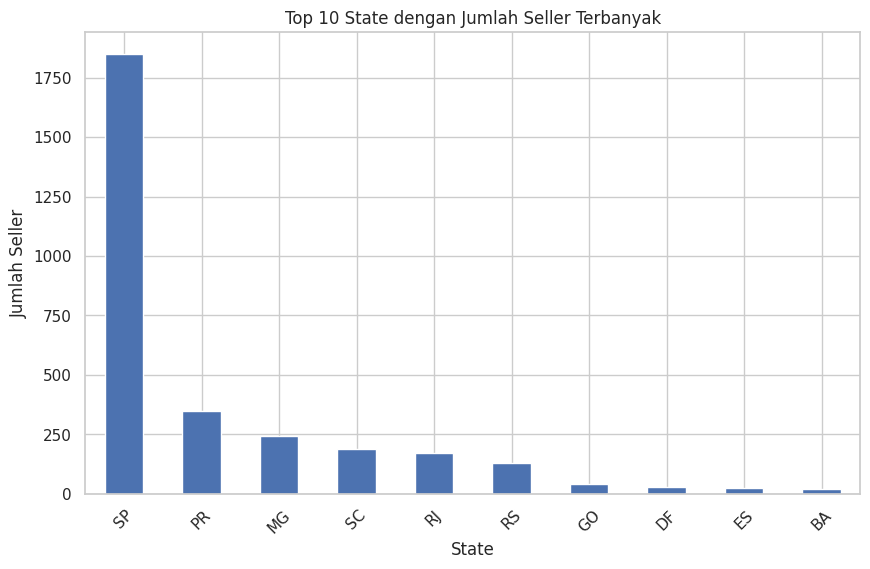

In [9]:
plt.figure()
seller_by_state.head(10).plot(kind='bar')
plt.title("Top 10 State dengan Jumlah Seller Terbanyak")
plt.xlabel("State")
plt.ylabel("Jumlah Seller")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

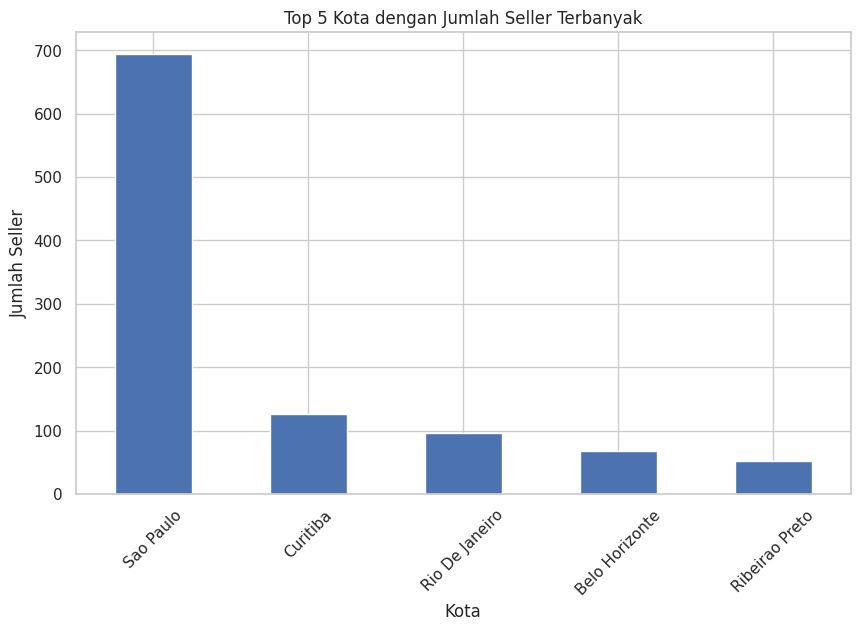

In [10]:
plt.figure()
seller_by_city.head(5).plot(kind='bar')
plt.title("Top 5 Kota dengan Jumlah Seller Terbanyak")
plt.xlabel("Kota")
plt.ylabel("Jumlah Seller")
plt.xticks(rotation=45)
plt.show()

**Insight:**
Pertanyaan 1: Bagaimana persebaran seller di setiap state dan wilayah mana yang menunjukkan dominasi aktivitas penjualan?

Insight:

- State dengan jumlah seller terbanyak adalah SP.
- Terdapat perbedaan jumlah seller yang cukup signifikan antar state.
- Aktivitas seller lebih terkonsentrasi pada state tertentu.
- State dengan jumlah seller rendah berpotensi menjadi target ekspansi bisnis.

Pertanyaan 2: Bagaimana persebaran seller di tingkat kota dan kota mana yang berpotensi menjadi pusat pertumbuhan bisnis?

Insight:

- Kota Sao Paulo memiliki jumlah seller tertinggi yaitu 694 seller.
- Selisih antara Sao Paulo dan kota kedua (Curitiba – 127 seller) sangat besar.
- Hal ini menunjukkan konsentrasi seller yang sangat tinggi di kota besar.
- Kota dengan jumlah seller rendah dapat menjadi peluang pengembangan pasar.

## Analisis Lanjutan (Opsional)

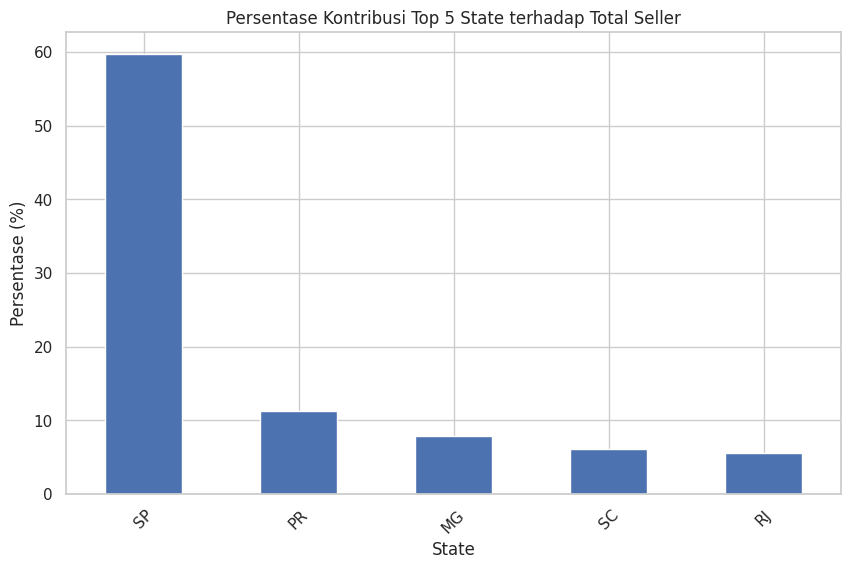

,count
seller_state,
SP,59.741519
PR,11.276252
MG,7.883683
SC,6.138934
RJ,5.525040


In [11]:
# ==============================
# Analisis Lanjutan
# ==============================

# Total seller
total_seller = len(df_sellers)

# Top 5 state
top5_state = seller_by_state.head(5)

# Menghitung persentase kontribusi
top5_percentage = (top5_state / total_seller) * 100

# Visualisasi persentase
plt.figure()
top5_percentage.plot(kind='bar')
plt.title("Persentase Kontribusi Top 5 State terhadap Total Seller")
plt.xlabel("State")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=45)
plt.show()

# Menampilkan persentase
top5_percentage

## Conclusion

- Conclution pertanyaan 1

Bagaimana persebaran seller di setiap state dan wilayah mana yang menunjukkan dominasi aktivitas penjualan?

Berdasarkan hasil analisis, state SP merupakan wilayah dengan jumlah seller terbanyak dibandingkan state lainnya. Distribusi seller antar state terlihat tidak merata, dengan konsentrasi yang cukup tinggi pada beberapa wilayah utama.

Hal ini menunjukkan bahwa aktivitas bisnis lebih terpusat pada state tertentu. Oleh karena itu, perusahaan dapat mempertimbangkan strategi ekspansi dan pemerataan distribusi seller ke state dengan jumlah seller yang masih rendah guna meningkatkan penetrasi pasar.

- Conclution pertanyaan 2

Bagaimana persebaran seller di tingkat kota dan kota mana yang berpotensi menjadi pusat pertumbuhan bisnis?

Hasil analisis menunjukkan bahwa kota Sao Paulo memiliki jumlah seller tertinggi yaitu 694 seller, dengan selisih yang signifikan dibandingkan kota lainnya seperti Curitiba dan Rio De Janeiro.

Temuan ini mengindikasikan bahwa aktivitas seller sangat terkonsentrasi di kota besar. Untuk menjaga pertumbuhan yang berkelanjutan, perusahaan dapat mengembangkan strategi untuk mendorong pertumbuhan seller di kota-kota lain yang masih memiliki jumlah seller relatif rendah.